In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ecom_data = pd.read_csv('../data/e_commerce.csv')

In [4]:
print("First 5 rows of the dataset:")
display(ecom_data.head())

First 5 rows of the dataset:


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
print("\nDataset Information:")
ecom_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
print("\nBasic Statistical Summary:")
display(ecom_data.describe())


Basic Statistical Summary:


,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [7]:
print("\nMissing Values in the Dataset:")
print(ecom_data.isnull().sum())


Missing Values in the Dataset:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


In [8]:
ecom_data.drop_duplicates(subset=['user_id'], inplace=True)
print("\nData after removing duplicate user_id entries:")
print(f"Number of rows: {len(ecom_data)}")


Data after removing duplicate user_id entries:
Number of rows: 290584


In [9]:
ecom_data['timestamp'] = pd.to_datetime(ecom_data['timestamp'])

In [10]:
print("\nCounts of each group (Control vs Treatment):")
print(ecom_data['group'].value_counts())


Counts of each group (Control vs Treatment):
group
treatment    145352
control      145232
Name: count, dtype: int64


In [11]:
print(ecom_data['landing_page'].value_counts())

landing_page
new_page    145320
old_page    145264
Name: count, dtype: int64


In [12]:
misalignments = ecom_data.query('(group == "treatment" and landing_page != "new_page") or \
                                 (group == "control" and landing_page != "old_page")')
print(f"\nNumber of misalignments between group and landing page: {len(misalignments)}")


Number of misalignments between group and landing page: 2044


In [13]:
conversion_rates = ecom_data.groupby(['group'])['converted'].mean()
print("\nConversion Rates by Group:")
print(conversion_rates)


Conversion Rates by Group:
group
control      0.120297
treatment    0.118843
Name: converted, dtype: float64


In [14]:
overall_conversion_rate = ecom_data['converted'].mean()
print(f"\nOverall Conversion Rate: {overall_conversion_rate:.2%}")


Overall Conversion Rate: 11.96%


In [15]:
ecom_data['date'] = ecom_data['timestamp'].dt.date
ecom_data['hour'] = ecom_data['timestamp'].dt.hour

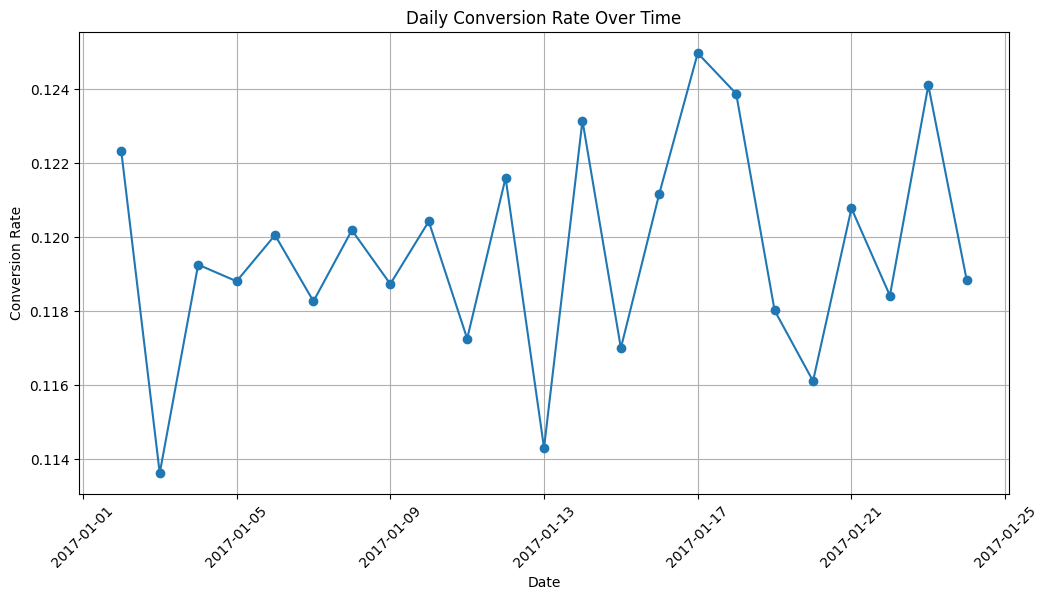

In [16]:
daily_conversion = ecom_data.groupby('date')['converted'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_conversion, marker='o')
plt.title("Daily Conversion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.grid()
plt.show()

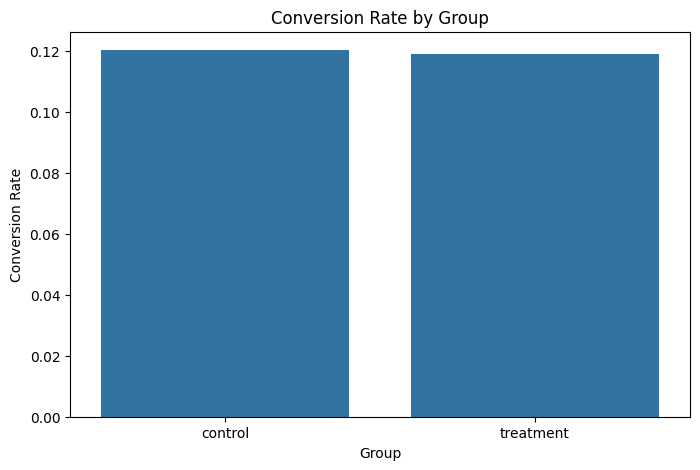

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x='group', y='converted', data=ecom_data, errorbar=None)
plt.title("Conversion Rate by Group")
plt.xlabel("Group")
plt.ylabel("Conversion Rate")
plt.show()

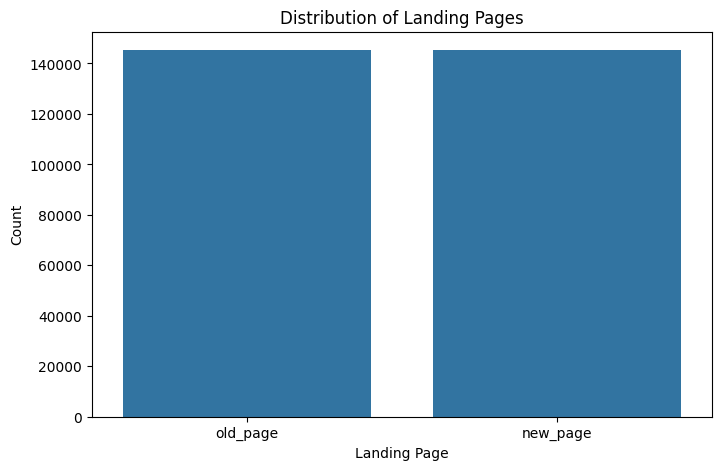

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='landing_page', data=ecom_data)
plt.title("Distribution of Landing Pages")
plt.xlabel("Landing Page")
plt.ylabel("Count")
plt.show()

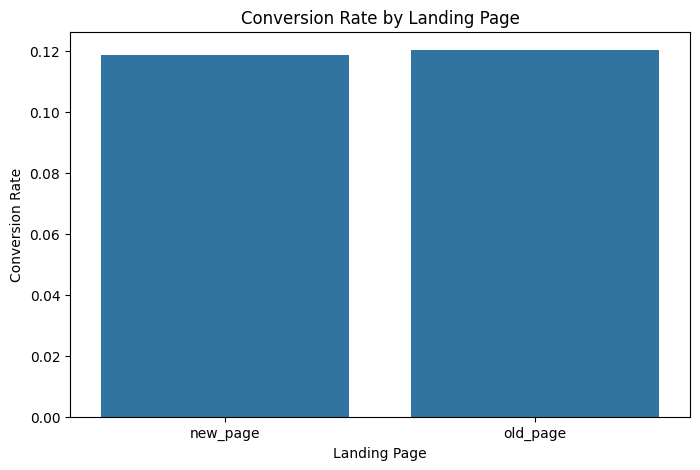

In [20]:
conversion_by_page = ecom_data.groupby('landing_page')['converted'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_by_page.index, y=conversion_by_page.values)
plt.title("Conversion Rate by Landing Page")
plt.xlabel("Landing Page")
plt.ylabel("Conversion Rate")
plt.show()